In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
data_desc = pd.read_csv('data_description.csv')
data_desc

,Kolom,Keterangan
0,job_level,Level Jabatan Pekerja
1,job_duration_in_current_job_level,Masa Kerja pada job level saat ini
2,person_level,Level personal Pekerja
3,job_duration_in_current_person_level,Masa Kerja pada person level saat ini
4,job_duration_in_current_branch,Masa Kerja pada unit kerja saat ini
5,Employee_type,"Tipe Pekerja ( 3 tipe Relationship Manager, ti..."
6,gender,Jenis Kelamin
7,age,Usia
8,marital_status_maried(Y/N),Status Pernikahan (Y / N)
9,number_of_dependences,Jumlah anak dalam tanggungan


In [3]:
submission = pd.read_csv('sample_submission.csv')
submission

,index,Best Performance
0,0,0.131028
1,1,0.379354
2,2,0.031798
3,3,0.285220
4,4,0.848732
...,...,...
5995,5995,0.597299
5996,5996,0.072188
5997,5997,0.555975
5998,5998,0.933239


In [4]:
df_train = pd.read_csv('train.csv')
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,2012,5,5,4,0,4,1,85.94,1.0,0


In [5]:
df_test = pd.read_csv('test.csv')
df_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,3.34,2007,5,3,2,0,3,0,82.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1988,Y,0,...,3.01,2015,2,2,2,0,4,0,58.60,0.0
5996,JG04,1.352775,PG03,1.352775,1.581139,RM_type_A,2,1989,Y,1,...,3.56,2011,5,3,2,7,3,0,90.64,3.0
5997,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1991,Y,0,...,3.59,2013,3,2,3,0,16,0,13.02,0.0
5998,JG05,1.385641,PG05,1.385641,0.648074,RM_type_A,2,1980,Y,2,...,2.93,2003,14,7,6,8,2,0,82.26,0.0


# **EDA**

In [6]:
df_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [7]:
summary = []

for col in df_train.columns:
    summary.append([
        col, df_train[col].dtype, df_train[col].isnull().sum(), 
        round((df_train[col].isnull().sum()/len(df_train[col]))*100,2),
        df_train[col].nunique(), list(df_train[col].sample(5).drop_duplicates().values)
    ])

In [8]:
df_summary = pd.DataFrame(summary, columns=['column', 'dtype', 'null', 'null_pct', 'nunique', 'sample'])
df_summary

,column,dtype,null,null_pct,nunique,sample
0,job_level,object,0,0.00,3,[JG04]
1,job_duration_in_current_job_level,float64,0,0.00,97,"[1.0816653826392, 1.2569805089976498, 1.385640..."
2,person_level,object,0,0.00,8,"[PG03, PG06]"
3,job_duration_in_current_person_level,float64,0,0.00,72,"[1.3856406460551, 1.2569805089976498, 1.153256..."
4,job_duration_in_current_branch,float64,0,0.00,69,"[1.22474487139159, 0.5, 0.707106781186548]"
5,Employee_type,object,0,0.00,3,"[RM_type_A, RM_type_B, RM_type_C]"
6,gender,int64,0,0.00,2,[2]
7,age,int64,0,0.00,35,"[1989, 1984, 1987, 1988]"
8,marital_status_maried(Y/N),object,0,0.00,2,"[Y, N]"
9,number_of_dependences,int64,0,0.00,7,"[2, 0, 1]"


In [9]:
df_train.loc[df_train['Last_achievement_%'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


In [10]:
df_train.loc[df_train['Achievement_above_100%_during3quartal'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


Only 1 row has missing value --> drop it

In [11]:
df_train.dropna(inplace=True)

In [12]:
df_train.shape

(11152, 22)

In [203]:
df_train.duplicated().sum()

0

In [13]:
df_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


## ***Analysis by `job_level`***

In [16]:
jg03 = df_train[df_train['job_level']=='JG03']
jg04 = df_train[df_train['job_level']=='JG04']
jg05 = df_train[df_train['job_level']=='JG05']

### **job_level**

In [14]:
df_train['job_level'].value_counts()

JG04    10412
JG05      704
JG03       36
Name: job_level, dtype: int64

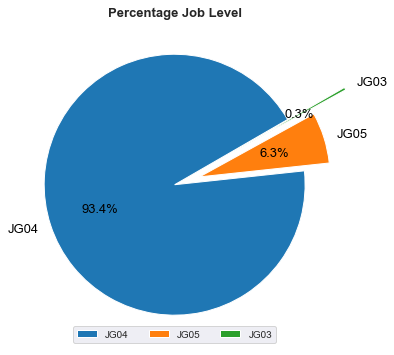

In [15]:
plt.figure(figsize=(16,6))
plt.title('Percentage Job Level', fontsize=13, fontweight='bold')
plt.pie(df_train['job_level'].value_counts(), 
        autopct='%.1f%%', startangle=30, labels=[x for x in df_train['job_level'].unique()], 
        textprops={'fontsize':13, 'color':'black'}, explode=[0,0.2,0.5])

plt.legend([x for x in df_train['job_level'].unique()], 
           loc='lower center', ncol=3)
plt.show()

### job_duration_in_current_job_level

 Masa Kerja pada job level saat ini

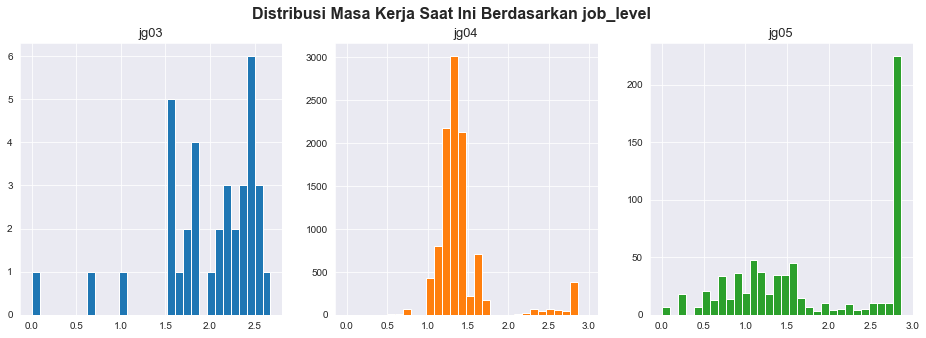

In [17]:
data=[jg03, jg04, jg05]
color = ['tab:blue', 'tab:orange', 'tab:green']
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Masa Kerja Saat Ini Berdasarkan job_level', fontsize=16, fontweight='bold')
for x in range(len(data)) :
    plt.subplot(1,3,1+x)
    plt.title('jg0'+str(3+x), fontsize=13)
    data[x]['job_duration_in_current_job_level'].hist(bins=30, color=color[x])

### person_level

Level personal Pekerja

In [91]:
df_train['person_level'].value_counts()

PG03    9654
PG04     757
PG06     378
PG05     308
PG07      19
PG01      19
PG02      16
PG08       1
Name: person_level, dtype: int64

In [171]:
jg03['person_level'].value_counts()

PG01    19
PG02    16
PG03     1
Name: person_level, dtype: int64

In [172]:
jg04['person_level'].value_counts()

PG03    9653
PG04     757
PG05       2
Name: person_level, dtype: int64

In [173]:
jg05['person_level'].value_counts()

PG06    378
PG05    306
PG07     19
PG08      1
Name: person_level, dtype: int64

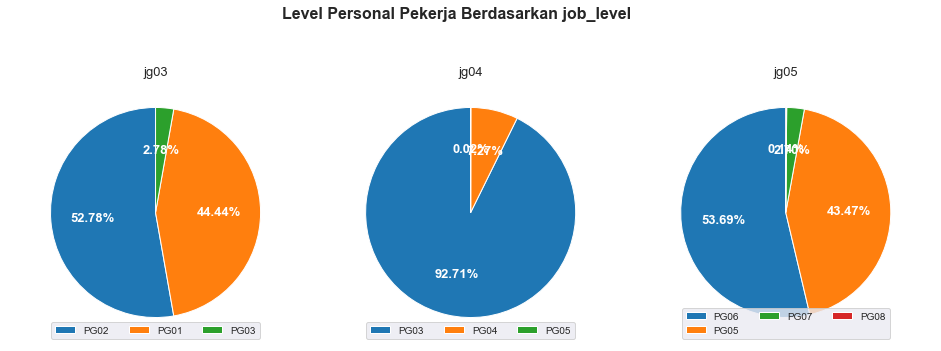

In [206]:
plt.figure(figsize=(16,6))
plt.suptitle('Level Personal Pekerja Berdasarkan job_level', fontsize=16, fontweight='bold')
for x in range(len(data)):
    plt.subplot(1,3,1+x)
    plt.pie(data[x]['person_level'].value_counts(),
           autopct='%.2f%%', startangle=90, labels=[x for x in data[x]['person_level'].unique()],
           textprops={'fontsize':13, 'color':'white', 'fontweight':'bold'})
    plt.title('jg0'+str(3+x), fontsize=13)
    plt.legend(loc='lower center', ncol=3)

### Job_duration_in_current_branch

Masa Kerja pada person level saat ini

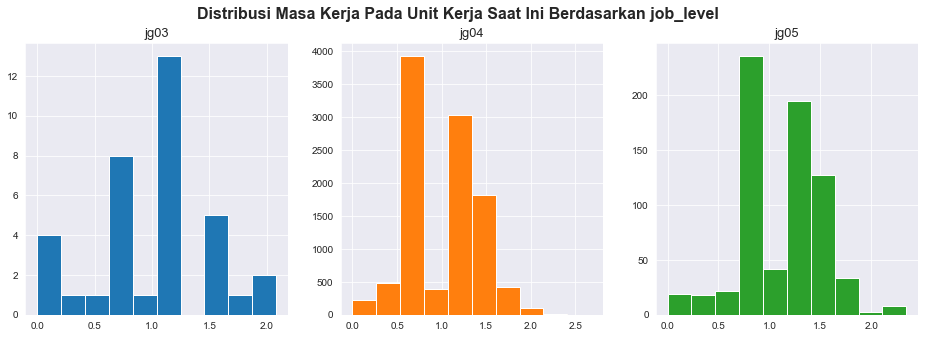

In [18]:
data=[jg03, jg04, jg05]
color = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Masa Kerja Pada Unit Kerja Saat Ini Berdasarkan job_level', fontsize=16, fontweight='bold')
for x in range(len(data)) :
    plt.subplot(1,3,1+x)
    plt.title('jg0'+str(3+x), fontsize=13)
    data[x]['job_duration_in_current_branch'].hist(color=color[x])

### Employee Type

Tipe Pekerja ( 3 tipe Relationship Manager, tipe A, B , dan C)

In [19]:
jg03['Employee_type'].value_counts()

RM_type_A    18
RM_type_B    17
RM_type_C     1
Name: Employee_type, dtype: int64

In [174]:
jg04['Employee_type'].value_counts()

RM_type_A    6602
RM_type_B    3363
RM_type_C     447
Name: Employee_type, dtype: int64

In [175]:
jg05['Employee_type'].value_counts()

RM_type_A    666
RM_type_C     38
Name: Employee_type, dtype: int64

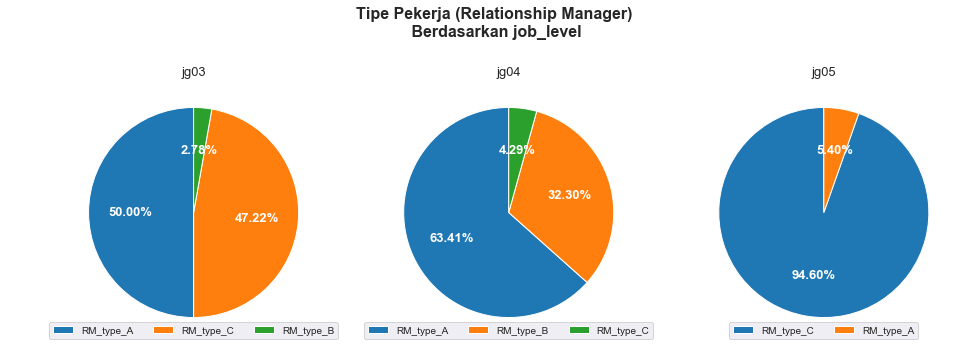

In [20]:
plt.figure(figsize=(16,6))
plt.suptitle('Tipe Pekerja (Relationship Manager)\n Berdasarkan job_level', fontsize=16, fontweight='bold')
for x in range(len(data)):
    plt.subplot(1,3,1+x)
    plt.pie(data[x]['Employee_type'].value_counts(),
           autopct='%.2f%%', startangle=90, labels=[x for x in data[x]['Employee_type'].unique()],
           textprops={'fontsize':13, 'color':'white', 'fontweight':'bold'})
    plt.title('jg0'+str(3+x), fontsize=13)
    plt.legend(loc='lower center', ncol=3)

### Gender

Jenis Kelamin

In [21]:
df_train['gender'].value_counts()

2    8204
1    2948
Name: gender, dtype: int64

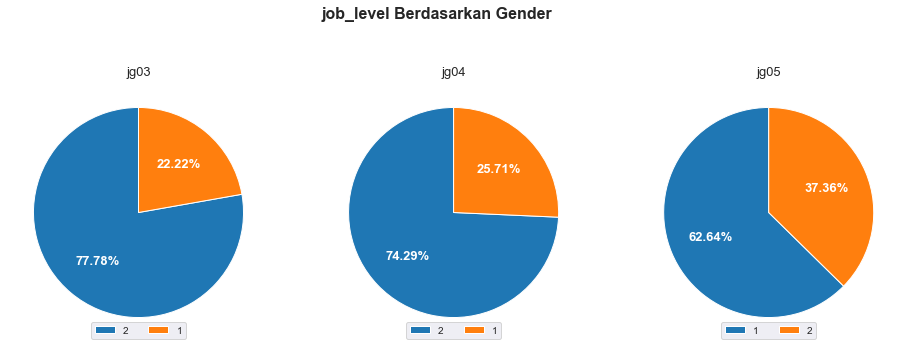

In [22]:
plt.figure(figsize=(16,6))
plt.suptitle('job_level Berdasarkan Gender ', fontsize=16, fontweight='bold')
for x in range(len(data)):
    plt.subplot(1,3,1+x)
    plt.pie(data[x]['gender'].value_counts(),
           autopct='%.2f%%', startangle=90, labels=[x for x in data[x]['gender'].unique()],
           textprops={'fontsize':13, 'color':'white', 'fontweight':'bold'})
    plt.title('jg0'+str(3+x), fontsize=13)
    plt.legend(loc='lower center', ncol=3)

### Umur

Usia

In [23]:
df_train['age']

0        1985
1        1989
2        1970
3        1967
4        1965
         ... 
11148    1986
11149    1988
11150    1991
11151    1987
11152    1980
Name: age, Length: 11152, dtype: int64

In [24]:
xx = pd.to_datetime(df_train['age'], format='%Y').dt.year
xx

0        1985
1        1989
2        1970
3        1967
4        1965
         ... 
11148    1986
11149    1988
11150    1991
11151    1987
11152    1980
Name: age, Length: 11152, dtype: int64

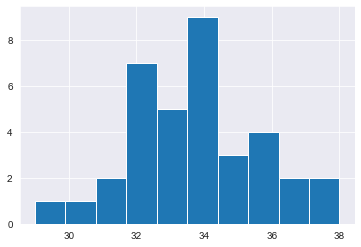

In [25]:
(2021-data[0]['age']).hist()

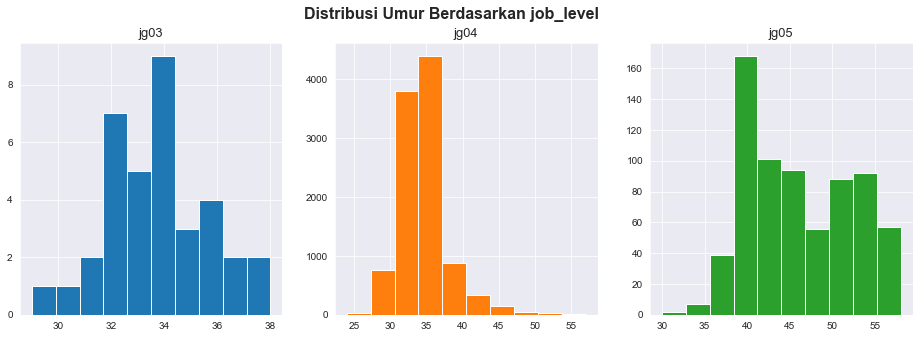

In [26]:
# data=[jg03, jg04, jg05]
# color = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Umur Berdasarkan job_level', fontsize=16, fontweight='bold')
for x in range(len(data)) :
    plt.subplot(1,3,1+x)
    plt.title('jg0'+str(3+x), fontsize=13)
    (2021-data[x]['age']).hist(bins=10, color=color[x])

### marital_status_married(Y/N)

Status Pernikahan (Y / N)

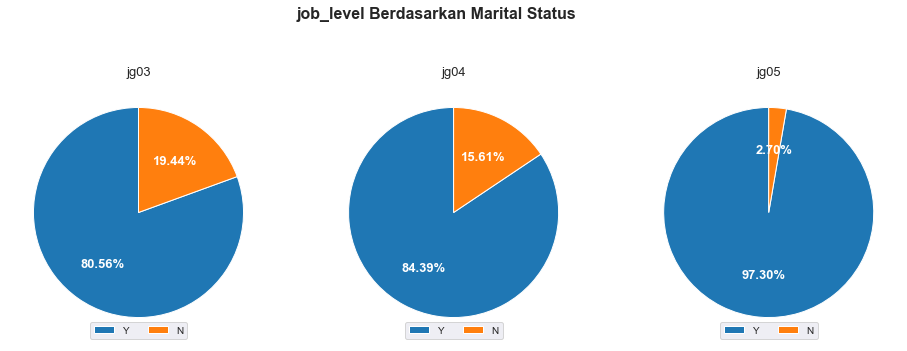

In [27]:
plt.figure(figsize=(16,6))
plt.suptitle('job_level Berdasarkan Marital Status ', fontsize=16, fontweight='bold')
for x in range(len(data)):
    plt.subplot(1,3,1+x)
    plt.pie(data[x]['marital_status_maried(Y/N)'].value_counts(),
           autopct='%.2f%%', startangle=90, labels=[x for x in data[x]['marital_status_maried(Y/N)'].unique()],
           textprops={'fontsize':13, 'color':'white', 'fontweight':'bold'})
    plt.title('jg0'+str(3+x), fontsize=13)
    plt.legend(loc='lower center', ncol=3)

### number_of_dependences

Jumlah anak dalam tanggungan

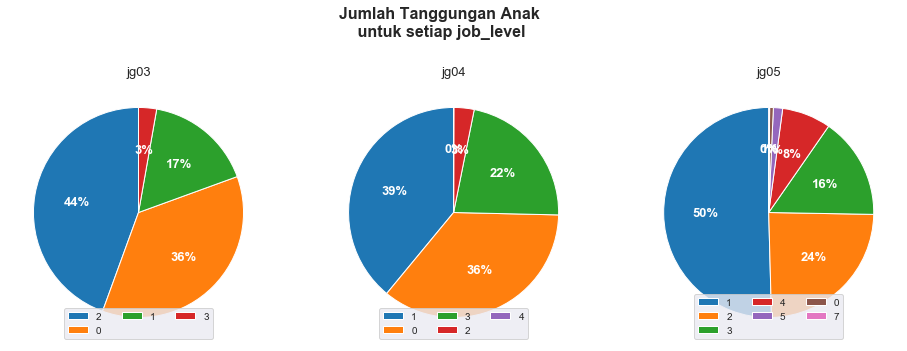

In [28]:
plt.figure(figsize=(16,6))
plt.suptitle('Jumlah Tanggungan Anak\n untuk setiap job_level', fontsize=16, fontweight='bold')
for x in range(len(data)):
    plt.subplot(1,3,1+x)
    plt.pie(data[x]['number_of_dependences'].value_counts(),
           autopct='%.0f%%', startangle=90, labels=[x for x in data[x]['number_of_dependences'].unique()],
           textprops={'fontsize':13, 'color':'white', 'fontweight':'bold'})
    plt.title('jg0'+str(3+x), fontsize=13)
    plt.legend(loc='lower center', ncol=3)

### Education_level

Tingkat Pendidikan

In [148]:
df_train['Education_level'].value_counts()

level_4    9222
level_3    1742
level_1     140
level_5      43
level_2       4
level_0       1
Name: Education_level, dtype: int64

In [170]:
df_train[df_train['Education_level']=='level_0']

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,GPA_fix
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,4,2,3,2,3,0,46.37,0.0,0,2.86


In [149]:
jg04['Education_level'].value_counts()

level_4    8629
level_3    1665
level_1      77
level_5      36
level_2       4
level_0       1
Name: Education_level, dtype: int64

In [153]:
jg03['Education_level'].value_counts()

level_4    26
level_3    10
Name: Education_level, dtype: int64

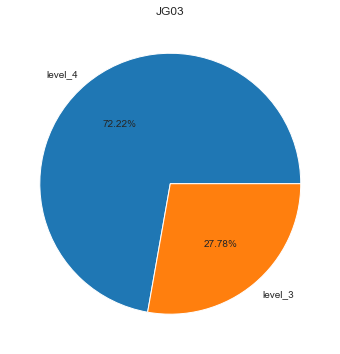

In [166]:
plt.figure(figsize=(16,6))
plt.title('JG03')
plt.pie(jg03['Education_level'].value_counts(), autopct='%.2f%%', labels= ['level_4', 'level_3'])
plt.show()

In [169]:
jg04['Education_level'].value_counts()

level_4    8629
level_3    1665
level_1      77
level_5      36
level_2       4
level_0       1
Name: Education_level, dtype: int64

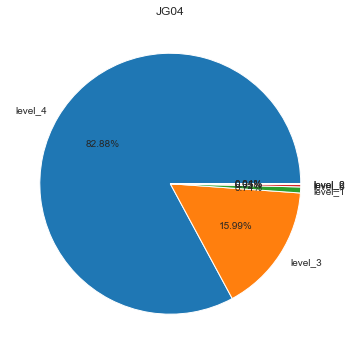

In [167]:
plt.figure(figsize=(16,6))
plt.title('JG04')
plt.pie(jg04['Education_level'].value_counts(), autopct='%.2f%%', labels= ['level_4', 'level_3', 'level_1', 'level_5', 'level_2', 'level_0'])
plt.show()

In [208]:
jg05['Education_level'].value_counts()

level_4    567
level_3     67
level_1     63
level_5      7
Name: Education_level, dtype: int64

In [211]:
jg05['Education_level'].value_counts().index

Index(['level_4', 'level_3', 'level_1', 'level_5'], dtype='object')

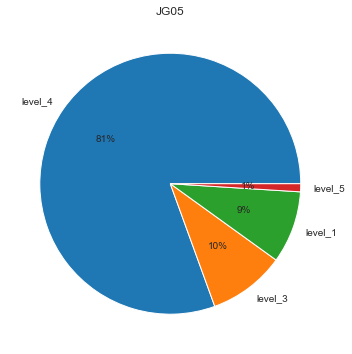

In [214]:
plt.figure(figsize=(16,6))
plt.title('JG05')
plt.pie(jg05['Education_level'].value_counts(), autopct='%.0f%%', labels= ['level_4', 'level_3','level_1','level_5'])
plt.show()

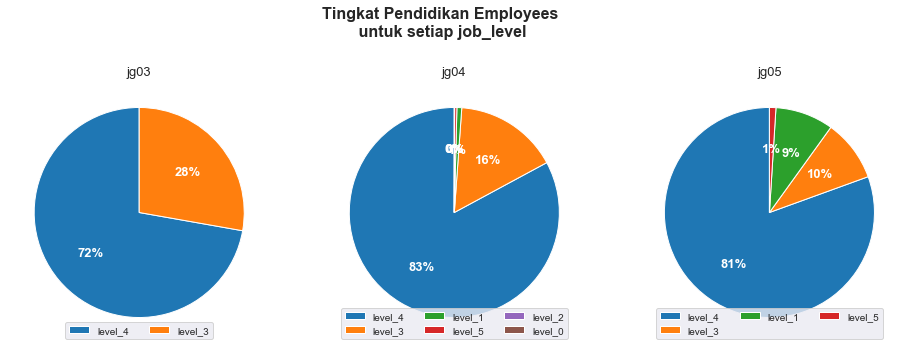

In [213]:
plt.figure(figsize=(16,6))
plt.suptitle('Tingkat Pendidikan Employees\n untuk setiap job_level', fontsize=16, fontweight='bold')
for x in range(len(data)):
    plt.subplot(1,3,1+x)
    plt.pie(data[x]['Education_level'].value_counts(),
           autopct='%.0f%%', startangle=90, labels=data[x]['Education_level'].value_counts().index,
           textprops={'fontsize':13, 'color':'white', 'fontweight':'bold'})
    plt.title('jg0'+str(3+x), fontsize=13)
    plt.legend(loc='lower center', ncol=3)

### GPA

IPK

***Kemungkinan Ada Kesalahan Input pada GPA***

In [30]:
df_train['GPA'].max()

378.0

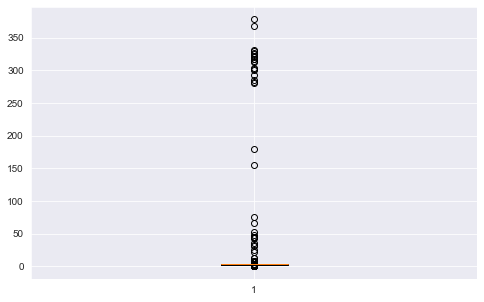

In [31]:
plt.figure(figsize=(8,5))
plt.boxplot(df_train['GPA'])
plt.show()

In [32]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [86]:
df_train[df_train['GPA']<=4.00]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,GPA_fix
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,4,2,3,2,3,0,46.37,0.0,0,2.86
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,28,10,9,6,2,1,40.73,0.0,0,0.00
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,29,11,6,0,4,10,47.42,0.0,1,0.00
5,JG05,2.828427,PG06,2.121320,1.118034,RM_type_A,1,1971,Y,3,...,28,7,9,4,0,0,48.46,0.0,0,0.00
6,JG05,2.828427,PG06,2.345208,2.102380,RM_type_A,1,1969,Y,2,...,29,8,6,2,8,0,60.38,0.0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,4,3,3,0,4,1,50.87,0.0,0,3.33
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,3,1,2,0,6,0,79.91,0.0,0,3.00
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2,1,2,0,4,0,78.38,0.0,0,3.48
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,5,5,4,0,4,1,85.94,1.0,0,3.53


In [87]:
df_train[df_train['GPA']>4.00]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,GPA_fix
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,4,4,3,0,0,1,47.68,0.0,0,0.728
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,30,9,8,2,3,0,47.18,0.0,0,0.720
9,JG04,1.118034,PG03,1.118034,0.412311,RM_type_B,2,1991,N,0,...,3,2,2,0,3,0,41.45,0.0,1,0.419
12,JG04,1.081665,PG03,1.081665,1.224745,RM_type_B,1,1993,N,0,...,3,2,2,0,3,0,44.93,0.0,0,0.830
15,JG04,1.385641,PG03,1.385641,0.707107,RM_type_A,2,1988,Y,3,...,3,3,4,1,10,2,43.54,0.0,0,0.682
16,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,1,1990,Y,0,...,3,2,3,0,11,2,31.08,0.0,0,0.782
17,JG04,1.292285,PG03,1.292285,0.707107,RM_type_A,2,1990,Y,1,...,3,3,5,0,6,4,44.24,0.0,0,0.700
21,JG04,1.292285,PG03,1.292285,1.191638,RM_type_A,2,1991,Y,1,...,2,2,3,0,3,0,42.71,0.0,0,0.869
36,JG04,1.292285,PG03,1.292285,1.224745,RM_type_A,2,1988,Y,0,...,7,3,5,0,7,0,88.45,3.0,0,4.000
37,JG05,1.414214,PG05,1.414214,1.191638,RM_type_A,2,1977,Y,1,...,18,12,9,11,10,2,66.03,0.0,0,4.000


In [216]:
len(df_train[df_train['GPA']>4.00]['GPA'])

52

In [95]:
wrong_gpa = round(len(df_train[df_train['GPA']>4.00]) / len(df_train) * 100, 2)
print(f'Presentase data dengan kemungkinan salah input pada kolom GPA : {wrong_gpa} %')

Presentase data dengan kemungkinan salah input pada kolom GPA : 0.47 %


In [115]:
data_gpa = df_train[df_train['GPA']<=4.00]

jg03_gpa = data_gpa[data_gpa['job_level']=='JG03']
jg04_gpa = data_gpa[data_gpa['job_level']=='JG04']
jg05_gpa = data_gpa[data_gpa['job_level']=='JG05']

In [223]:
jg03_gpa[jg03_gpa['GPA']<1]['GPA'].value_counts()

0.0    7
Name: GPA, dtype: int64

In [224]:
jg04_gpa[jg04_gpa['GPA']<1]['GPA'].value_counts()

0.0    1964
0.3       1
Name: GPA, dtype: int64

In [225]:
jg05_gpa[jg05_gpa['GPA']<1]['GPA'].value_counts()

0.0    177
Name: GPA, dtype: int64

In [227]:
print(f'Total GPA di bawah 1.00 : {round((7+1965+177)/len(df_train)*100,2)} %')

Total GPA di bawah 1.00 : 19.27 %


In [116]:
data_gpa = [jg03_gpa,jg04_gpa,jg05_gpa]

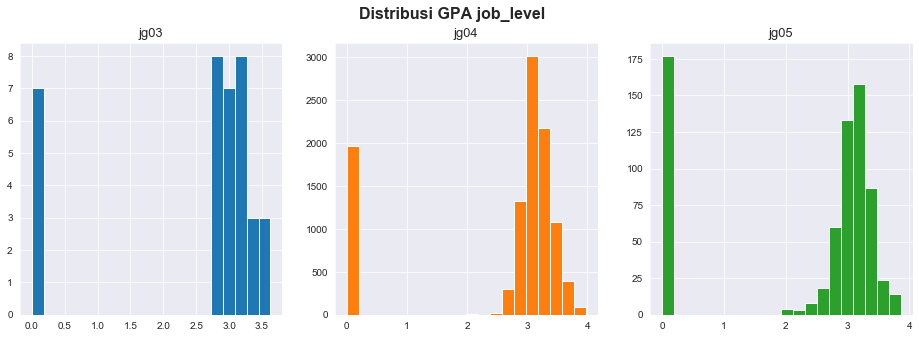

In [118]:
data_gpa = [jg03_gpa,jg04_gpa,jg05_gpa]

plt.figure(figsize=(16,5))
plt.suptitle('Distribusi GPA job_level', fontsize=16, fontweight='bold')
for x in range(len(data_gpa)) :
    plt.subplot(1,3,1+x)
    plt.title('jg0'+str(3+x), fontsize=13)
    data_gpa[x]['GPA'].hist(bins=20, color=color[x])

### Job Duration From Training

Lama bekerja mulai dari training

In [182]:
df_train['job_duration_from_training']

0         4
1         4
2        28
3        29
4        30
         ..
11148     4
11149     3
11150     2
11151     5
11152    14
Name: job_duration_from_training, Length: 11152, dtype: int64

In [183]:
df_train[df_train['job_duration_from_training']==30]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,GPA_fix
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,30,9,8,2,3,0,47.18,0.0,0,0.72
41,JG04,2.738613,PG04,2.828427,0.707107,RM_type_A,2,1965,Y,2,...,30,5,10,0,10,11,28.33,0.0,0,0.00
63,JG05,2.828427,PG06,2.828427,0.707107,RM_type_C,2,1969,Y,3,...,30,12,9,0,7,1,46.85,0.0,0,0.00
71,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,1,1967,Y,4,...,30,12,8,3,2,0,74.83,0.0,0,0.00
80,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,1,1969,Y,4,...,30,9,5,0,10,0,76.49,0.0,0,0.00
81,JG05,1.936492,PG06,2.828427,1.224745,RM_type_A,2,1965,Y,3,...,30,8,6,0,3,1,46.72,0.0,0,0.00
99,JG05,2.828427,PG06,2.828427,0.412311,RM_type_C,1,1967,Y,2,...,30,8,7,0,3,4,61.69,0.0,0,0.00
104,JG05,2.828427,PG06,1.581139,0.648074,RM_type_A,2,1963,Y,2,...,30,13,7,0,4,3,54.93,0.0,0,0.00
108,JG05,2.236068,PG06,2.828427,1.224745,RM_type_A,1,1969,Y,3,...,30,7,7,0,6,0,73.24,0.0,0,1.55
120,JG05,2.828427,PG06,2.828427,1.118034,RM_type_A,2,1970,Y,2,...,30,8,6,8,5,1,66.29,0.0,0,0.00


In [179]:
df_train['job_duration_in_current_job_level']

0        1.352775
1        1.292285
2        2.565151
3        2.828427
4        2.828427
           ...   
11148    1.256981
11149    1.385641
11150    1.256981
11151    1.118034
11152    2.828427
Name: job_duration_in_current_job_level, Length: 11152, dtype: float64

In [180]:
df_train['job_duration_in_current_person_level']

0        1.352775
1        1.292285
2        2.308679
3        1.000000
4        2.828427
           ...   
11148    1.256981
11149    1.385641
11150    1.256981
11151    1.118034
11152    2.121320
Name: job_duration_in_current_person_level, Length: 11152, dtype: float64

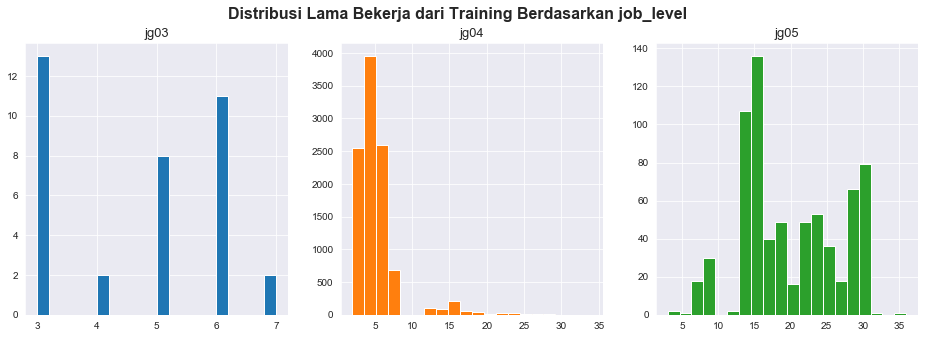

In [55]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Lama Bekerja dari Training Berdasarkan job_level', fontsize=16, fontweight='bold')
for x in range(len(data)) :
    plt.subplot(1,3,1+x)
    plt.title('jg0'+str(3+x), fontsize=13)
    data[x]['job_duration_from_training'].hist(bins=20, color=color[x])

### Branch Rotation

Jumlah rotasi pindah unit kerja

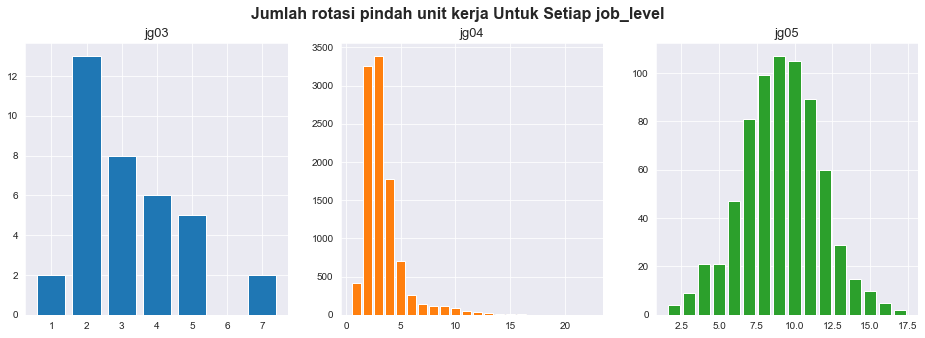

In [56]:
plt.figure(figsize=(16,5))
plt.suptitle('Jumlah rotasi pindah unit kerja Untuk Setiap job_level', fontsize=16, fontweight='bold')
for x in range(len(data)) :
    plt.subplot(1,3,1+x)
    plt.title('jg0'+str(3+x), fontsize=13)
    plt.bar(data[x]['branch_rotation'].value_counts().index, data[x]['branch_rotation'].value_counts().values, color=color[x])

### Job Rotation

Jumlah rotasi pindah jabatan

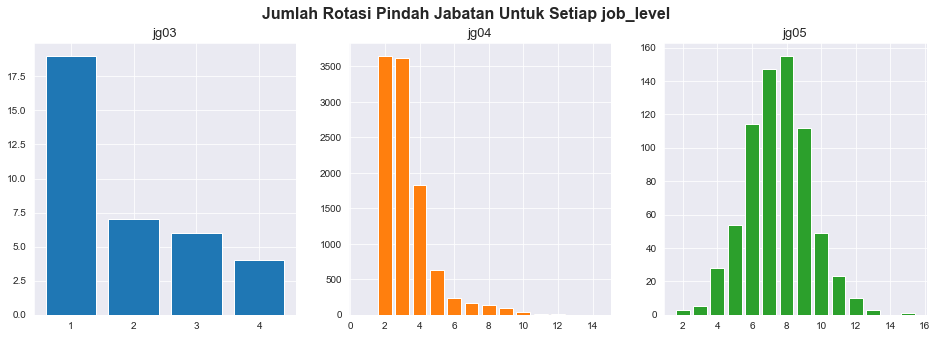

In [57]:
plt.figure(figsize=(16,5))
plt.suptitle('Jumlah Rotasi Pindah Jabatan Untuk Setiap job_level', fontsize=16, fontweight='bold')
for x in range(len(data)) :
    plt.subplot(1,3,1+x)
    plt.title('jg0'+str(3+x), fontsize=13)
    plt.bar(data[x]['job_rotation'].value_counts().index, data[x]['job_rotation'].value_counts().values, color=color[x])

### Assign Other Position

Jumlah rotasi penugasan

In [185]:
jg05['assign_of_otherposition'].value_counts()

0     330
1      96
2      60
4      37
5      35
3      33
6      22
7      22
9      13
8      13
10     10
13      7
11      6
12      5
14      4
16      3
17      3
15      2
21      1
19      1
29      1
Name: assign_of_otherposition, dtype: int64

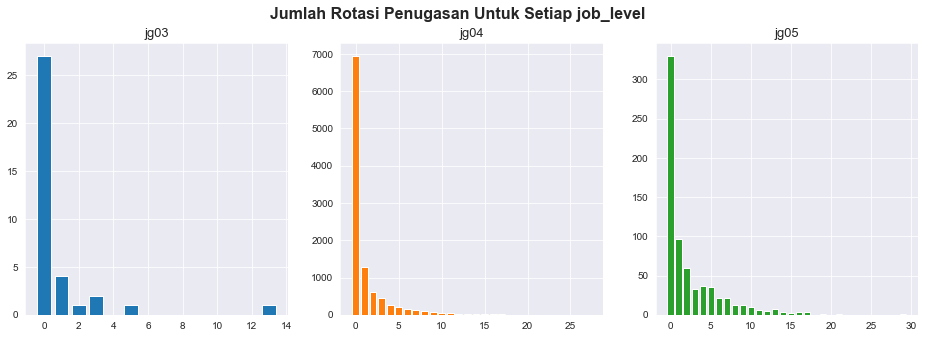

In [58]:
plt.figure(figsize=(16,5))
plt.suptitle('Jumlah Rotasi Penugasan Untuk Setiap job_level', fontsize=16, fontweight='bold')
for x in range(len(data)) :
    plt.subplot(1,3,1+x)
    plt.title('jg0'+str(3+x), fontsize=13)
    plt.bar(data[x]['assign_of_otherposition'].value_counts().index, 
            data[x]['assign_of_otherposition'].value_counts().values, color=color[x])

### Annual Leave

Jumlah Cuti Tahunan

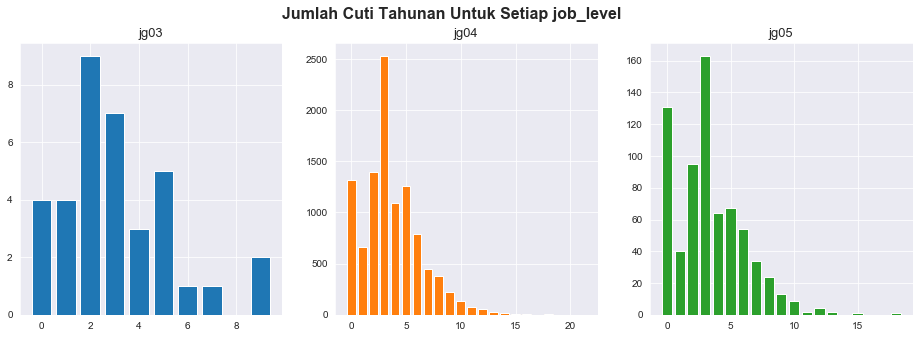

In [59]:
plt.figure(figsize=(16,5))
plt.suptitle('Jumlah Cuti Tahunan Untuk Setiap job_level', fontsize=16, fontweight='bold')
for x in range(len(data)) :
    plt.subplot(1,3,1+x)
    plt.title('jg0'+str(3+x), fontsize=13)
    plt.bar(data[x]['annual leave'].value_counts().index, 
            data[x]['annual leave'].value_counts().values, color=color[x])

### Sick Leaves

Jumlah Izin Sakit

In [60]:
df_train.describe()['sick_leaves']

count    11152.000000
mean         1.098906
std          2.711453
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         77.000000
Name: sick_leaves, dtype: float64

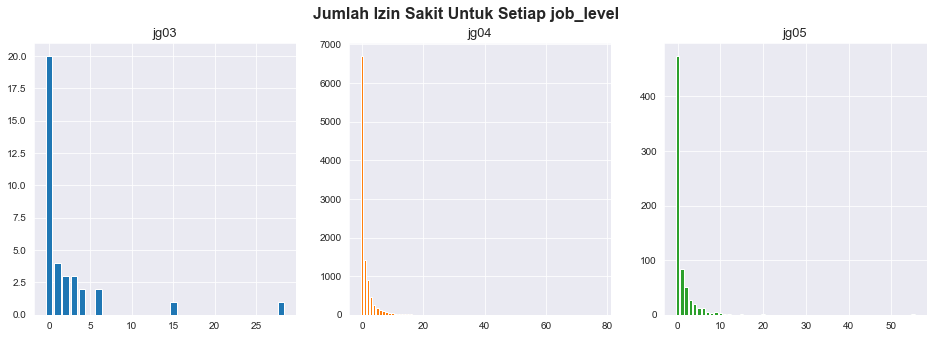

In [61]:
plt.figure(figsize=(16,5))
plt.suptitle('Jumlah Izin Sakit Untuk Setiap job_level', fontsize=16, fontweight='bold')
for x in range(len(data)) :
    plt.subplot(1,3,1+x)
    plt.title('jg0'+str(3+x), fontsize=13)
    plt.bar(data[x]['sick_leaves'].value_counts().index, 
            data[x]['sick_leaves'].value_counts().values, color=color[x])

### Last Achievement

Presentase pencapaian triwulan terakhir terhadap target

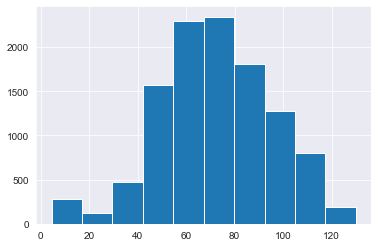

In [229]:
df_train['Last_achievement_%'].hist()

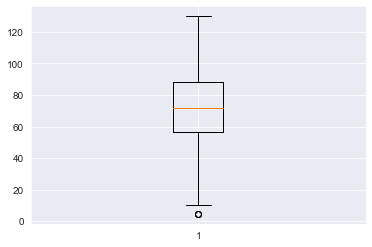

In [232]:
plt.boxplot(df_train['Last_achievement_%'])
plt.show()

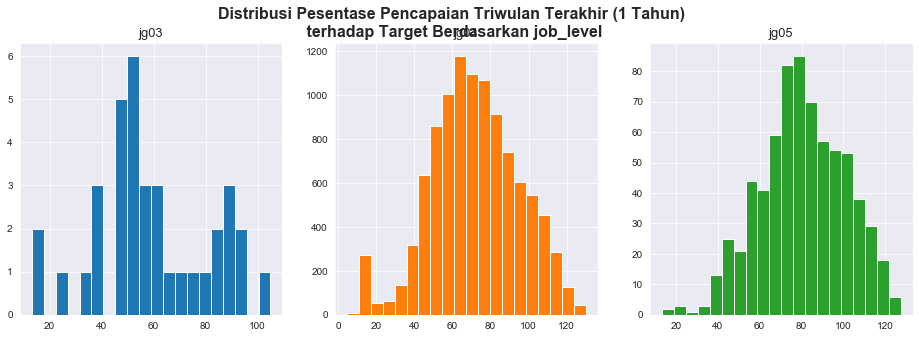

In [139]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Pesentase Pencapaian Triwulan Terakhir (1 Tahun)\n terhadap Target Berdasarkan job_level', fontsize=16, fontweight='bold')
for x in range(len(data)) :
    plt.subplot(1,3,1+x)
    plt.title('jg0'+str(3+x), fontsize=13)
    data[x]['Last_achievement_%'].hist(bins=20,color=color[x])

### Achievement_above_100%_during3quartal : 

Jumlah pencapaian diatas 100% dalam 3 tahun terkahir

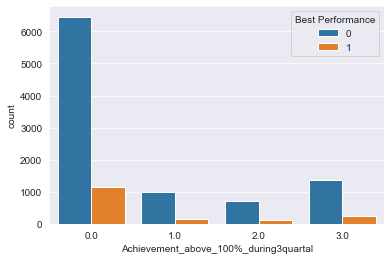

In [141]:
sns.countplot(df_train['Achievement_above_100%_during3quartal'], hue=df_train['Best Performance'])

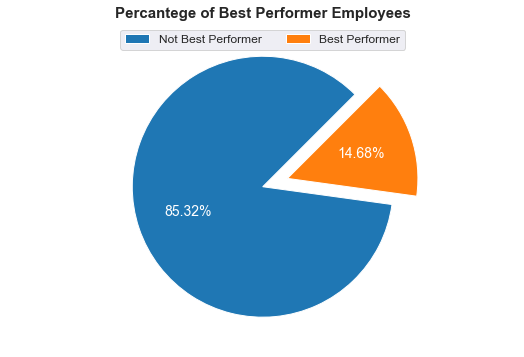

In [64]:
plt.figure(figsize=(8,6))
plt.title('Percantege of Best Performer Employees', loc='center', fontsize=15, fontweight='bold')
plt.pie(df_train['Best Performance'].value_counts(), autopct='%.2f%%', 
        labels=['Not Best Performer','Best Performer'], startangle=45, explode=[0,0.2], 
        textprops={'fontsize':14, 'color':'white'})
plt.legend(loc='upper center', ncol=2, prop={'size': 12})
plt.show()

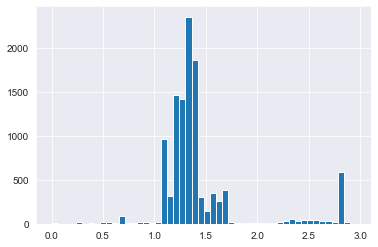

In [65]:
df_train['job_duration_in_current_job_level'].hist(bins=50)

**Best Performance Percentage**

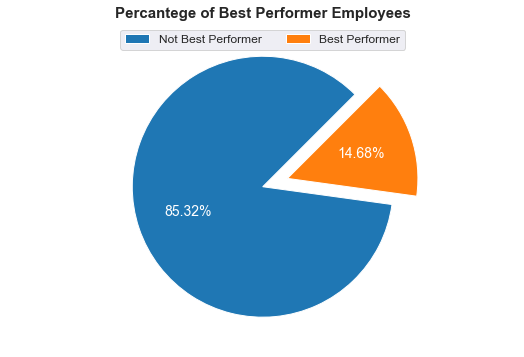

In [66]:
plt.figure(figsize=(8,6))
plt.title('Percantege of Best Performer Employees', loc='center', fontsize=15, fontweight='bold')
plt.pie(df_train['Best Performance'].value_counts(), autopct='%.2f%%', 
        labels=['Not Best Performer','Best Performer'], startangle=45, explode=[0,0.2], 
        textprops={'fontsize':14, 'color':'white'})
plt.legend(loc='upper center', ncol=2, prop={'size': 12})
plt.show()

**Achievement 3 Bulan Terkahir dari 3 kuartal**

In [67]:
df_train['Last_achievement_%']

0        46.37
1        47.68
2        40.73
3        47.42
4        47.18
         ...  
11148    50.87
11149    79.91
11150    78.38
11151    85.94
11152    79.99
Name: Last_achievement_%, Length: 11152, dtype: float64

**Achievment selama 3 Quartal terhadap Kategori Best Performance**

In [68]:
df_train['Achievement_above_100%_during3quartal'].value_counts()

0.0    7597
3.0    1604
1.0    1141
2.0     810
Name: Achievement_above_100%_during3quartal, dtype: int64

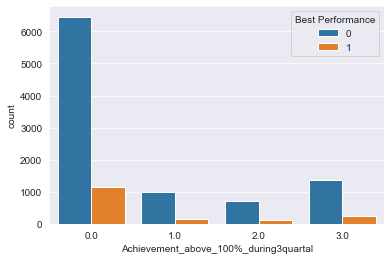

In [69]:
sns.countplot(df_train['Achievement_above_100%_during3quartal'], hue=df_train['Best Performance'])

**Correlation**

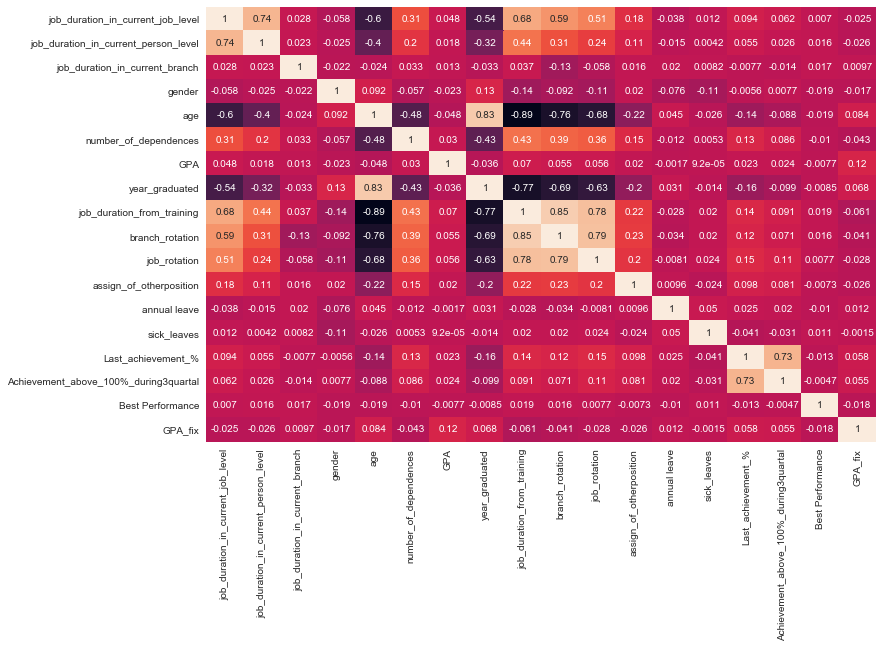

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), annot=True, cbar=False)
plt.show()

In [71]:
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,GPA_fix
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,4,2,3,2,3,0,46.37,0.0,0,2.860
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,4,4,3,0,0,1,47.68,0.0,0,0.728
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,28,10,9,6,2,1,40.73,0.0,0,0.000
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,29,11,6,0,4,10,47.42,0.0,1,0.000
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,30,9,8,2,3,0,47.18,0.0,0,0.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,4,3,3,0,4,1,50.87,0.0,0,3.330
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,3,1,2,0,6,0,79.91,0.0,0,3.000
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2,1,2,0,4,0,78.38,0.0,0,3.480
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,5,5,4,0,4,1,85.94,1.0,0,3.530


In [72]:
df_summary

,column,dtype,null,null_pct,nunique,sample
0,job_level,object,0,0.00,3,[JG04]
1,job_duration_in_current_job_level,float64,0,0.00,97,"[1.0816653826392, 1.2569805089976498, 1.385640..."
2,person_level,object,0,0.00,8,"[PG03, PG06]"
3,job_duration_in_current_person_level,float64,0,0.00,72,"[1.3856406460551, 1.2569805089976498, 1.153256..."
4,job_duration_in_current_branch,float64,0,0.00,69,"[1.22474487139159, 0.5, 0.707106781186548]"
5,Employee_type,object,0,0.00,3,"[RM_type_A, RM_type_B, RM_type_C]"
6,gender,int64,0,0.00,2,[2]
7,age,int64,0,0.00,35,"[1989, 1984, 1987, 1988]"
8,marital_status_maried(Y/N),object,0,0.00,2,"[Y, N]"
9,number_of_dependences,int64,0,0.00,7,"[2, 0, 1]"


In [73]:
job_level = pd.get_dummies(df_train['job_level'])
job_level

,JG03,JG04,JG05
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
11148,0,1,0
11149,0,1,0
11150,0,1,0
11151,0,1,0


In [78]:
person_level = pd.get_dummies(df_train['person_level'])
person_level

,PG01,PG02,PG03,PG04,PG05,PG06,PG07,PG08
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
11148,0,0,1,0,0,0,0,0
11149,0,0,1,0,0,0,0,0
11150,0,0,1,0,0,0,0,0
11151,0,0,1,0,0,0,0,0


In [80]:
employee_type = pd.get_dummies(df_train['Employee_type'])
employee_type

,RM_type_A,RM_type_B,RM_type_C
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
11148,1,0,0
11149,0,1,0
11150,0,1,0
11151,1,0,0


In [82]:
df_train[df_train['GPA']<=4.00]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,GPA_fix
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,4,2,3,2,3,0,46.37,0.0,0,2.86
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,28,10,9,6,2,1,40.73,0.0,0,0.00
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,29,11,6,0,4,10,47.42,0.0,1,0.00
5,JG05,2.828427,PG06,2.121320,1.118034,RM_type_A,1,1971,Y,3,...,28,7,9,4,0,0,48.46,0.0,0,0.00
6,JG05,2.828427,PG06,2.345208,2.102380,RM_type_A,1,1969,Y,2,...,29,8,6,2,8,0,60.38,0.0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,4,3,3,0,4,1,50.87,0.0,0,3.33
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,3,1,2,0,6,0,79.91,0.0,0,3.00
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2,1,2,0,4,0,78.38,0.0,0,3.48
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,5,5,4,0,4,1,85.94,1.0,0,3.53


In [84]:
df_train[df_train['GPA']>4.00]["GPA"]

1          7.28
4          7.20
9          4.19
12         8.30
15         6.82
16         7.82
17         7.00
21         8.69
36        45.00
37        45.29
38        44.83
40         8.10
42        30.73
52        43.57
64         6.18
66        32.12
68        75.00
78        53.06
86         7.00
89        25.87
90         7.49
91        13.40
93         6.36
95        43.03
103        8.40
107       22.00
108      155.00
127       36.30
130       47.35
132       44.56
134       66.00
138       13.43
1308     293.00
1986     285.00
2868     303.00
3560     327.00
4300     318.00
4950     330.00
5008     317.00
5238     315.00
5239     313.00
5241     301.00
5243     331.00
6221     325.00
6469     180.00
6473     280.00
7452     302.00
7476     282.00
7479     320.00
8275     322.00
10017    368.00
10377    378.00
Name: GPA, dtype: float64

In [125]:
df_train[df_train['Last_achievement_%']>100.00]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,GPA_fix
32,JG04,1.153256,PG03,1.153256,1.581139,RM_type_B,1,1996,N,0,...,3,1,2,0,2,2,102.38,1.0,0,0.00
34,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1993,Y,0,...,2,2,2,0,6,0,103.87,1.0,0,0.00
44,JG04,1.606238,PG03,1.606238,0.707107,RM_type_B,2,1977,Y,2,...,5,4,5,0,4,0,113.03,2.0,0,0.00
46,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1988,Y,2,...,5,3,3,2,3,1,121.61,3.0,0,0.00
48,JG04,1.606238,PG03,1.606238,1.039230,RM_type_A,2,1976,Y,2,...,5,3,2,5,10,0,105.86,3.0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11137,JG04,2.828427,PG03,1.000000,0.412311,RM_type_A,1,1983,Y,3,...,14,8,9,3,5,0,108.19,2.0,0,3.34
11139,JG04,1.634013,PG03,1.634013,0.648074,RM_type_A,2,1983,Y,1,...,5,5,3,4,3,0,106.44,1.0,0,3.35
11141,JG04,1.658312,PG03,1.658312,1.224745,RM_type_A,2,1988,Y,1,...,6,4,5,0,6,2,103.75,2.0,0,3.46
11145,JG05,1.473092,PG06,0.000000,1.224745,RM_type_A,1,1976,Y,3,...,17,8,8,3,5,2,119.74,3.0,0,3.27


In [124]:
df_train[df_train['Last_achievement_%']>100.00]['Achievement_above_100%_during3quartal'].value_counts()

3.0    1041
2.0     272
1.0     139
Name: Achievement_above_100%_during3quartal, dtype: int64

In [126]:
df_train[df_train['Last_achievement_%']<50.00]['Achievement_above_100%_during3quartal'].value_counts()

0.0    1708
1.0      32
2.0      13
Name: Achievement_above_100%_during3quartal, dtype: int64

In [129]:
df_train['Achievement_above_100%_during3quartal'].value_counts()

0.0    7597
3.0    1604
1.0    1141
2.0     810
Name: Achievement_above_100%_during3quartal, dtype: int64

In [136]:
df_train[df_train['Achievement_above_100%_during3quartal']==0.00]['Last_achievement_%'].max()

85.0

In [131]:
(len(df_train[df_train['Achievement_above_100%_during3quartal']==0.00]) / len(df_train)) *100

68.12230989956959

In [132]:
(len(df_train[df_train['Achievement_above_100%_during3quartal']==1.00]) / len(df_train)) *100

10.231348637015781

In [133]:
(len(df_train[df_train['Achievement_above_100%_during3quartal']==2.00]) / len(df_train)) *100

7.263271162123386

In [134]:
(len(df_train[df_train['Achievement_above_100%_during3quartal']==3.00]) / len(df_train)) *100

14.383070301291248

In [187]:
df_train[df_train['Last_achievement_%']>100.00]['job_level'].value_counts()

JG04    1318
JG05     133
JG03       1
Name: job_level, dtype: int64

In [190]:
odd = df_train[(df_train['Last_achievement_%']>100.00) & (df_train['job_level']=='JG03')]
odd

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,GPA_fix
1589,JG03,2.433105,PG02,1.581139,1.191638,RM_type_A,2,1987,Y,1,...,6,3,3,0,2,0,104.94,3.0,1,3.34


In [189]:
2021-1987

34

In [219]:
odd['GPA']

1589    3.34
Name: GPA, dtype: float64